## 2.1 Preprocess the raw data

Categorical features found in columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12]


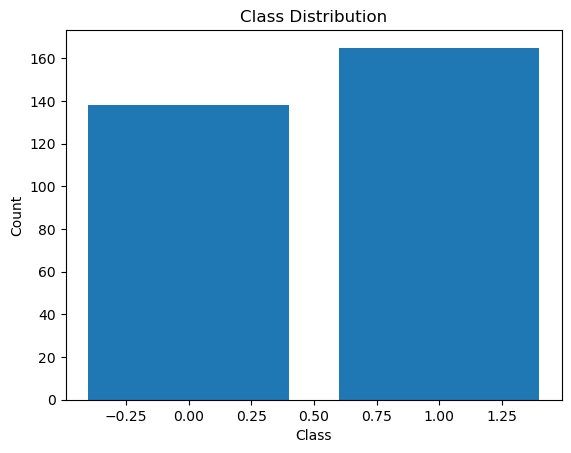

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
from random import shuffle
import random
random.seed(123)

# Load dataset
data = np.genfromtxt('heart.csv', delimiter=',', skip_header=1, filling_values=np.nan)

# Handle missing values by removing rows with NaN
data = data[~np.isnan(data).any(axis=1)]

# Extract X and y from the data
X = data[:, :-1] 
y = data[:, -1]  

# Check for categorical features
categorical_features = []
for i in range(X.shape[1]):
    unique_values = np.unique(X[:, i])
    if np.all(np.mod(unique_values, 1) == 0):  # Check if all unique values are integers
        categorical_features.append(i)

if categorical_features:
    print("Categorical features found in columns:", categorical_features)
else:
    print("No categorical features found.")

# Check if the dataset is balanced
y = y.astype(int)
class_distribution = np.bincount(y)
plt.bar(np.unique(y), class_distribution)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

## 2.2 Split the data into two subsets and normalize the features of samples

In [7]:
#Split the dataset into the train_val set and testing set.
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, 
                                                            test_size=0.12, 
                                                            random_state=0)
print("train_val: {}, test: {}".format(X_train_val.shape[0], X_test.shape[0]))

#Normalize features
normalizer = StandardScaler()
X_train_val = normalizer.fit_transform(X_train_val)
X_test = normalizer.transform(X_test)

train_val: 266, test: 37


## 2.3 Train the KNN model and select the hyperparameter with cross-validation

In [8]:
k_range = range(1, 5)
param_grid = dict(n_neighbors=k_range)

clf_knn =  KNeighborsClassifier(n_neighbors=1)

grid = GridSearchCV(clf_knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_val, y_train_val)

print(grid.best_score_)
print(grid.best_params_)

0.8194269741439554
{'n_neighbors': 3}


## 2.4 Evaluate the learned model

In [10]:
clf_knn =  KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
clf_knn.fit(X_train_val, y_train_val)

# evaluate the model on the testing set
y_test_pred = clf_knn.predict(X_test)


# Implementation of evaluation metrics
def accuracyScore(y_true, y_pred):
    correct = sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

def recallScore(y_true, y_pred):
    true_positives = sum((y_true == 1) & (y_pred == 1))
    actual_positives = sum(y_true == 1)
    return true_positives / actual_positives if actual_positives != 0 else 0

def precisionScore(y_true, y_pred):
    true_positives = sum((y_true == 1) & (y_pred == 1))
    predicted_positives = sum(y_pred == 1)
    return true_positives / predicted_positives if predicted_positives != 0 else 0

def f1Score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

acc = accuracyScore(y_test, y_test_pred)
f1 = f1Score(y_test, y_test_pred)
recall = recallScore(y_test, y_test_pred)
precision = precisionScore(y_test, y_test_pred)


print("accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f},".format(acc, recall, precision, f1))

accuracy: 0.838, recall: 0.824, precision: 0.824, f1: 0.824,
